<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [47]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



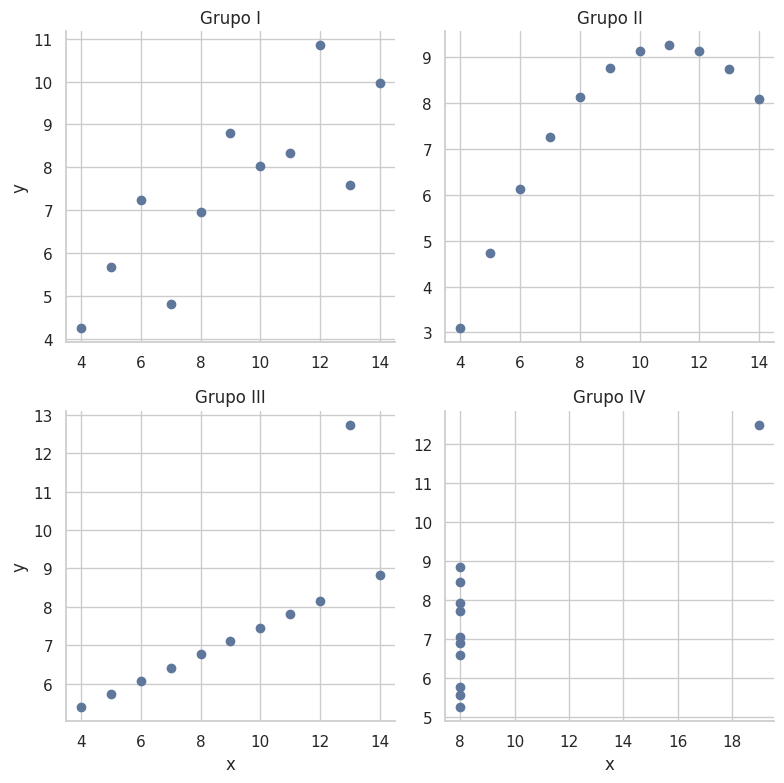

In [48]:
datos = sns.load_dataset("anscombe")

# Gráficos de dispersión por grupo
panel = sns.FacetGrid(datos, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
panel.map_dataframe(plt.scatter, "x", "y")
panel.set_axis_labels("x", "y")
panel.set_titles("Grupo {col_name}")
plt.tight_layout()
plt.show()

¿Puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos? Respuesta: Aunque los cuatro grupos presentan las mismas medidas estadísticas globales, sus gráficos muestran diferencias claras: el Grupo I sigue una tendencia lineal ascendente bien definida, el Grupo II exhibe una relación curva no lineal, el Grupo III mantiene una tendencia lineal pero con un punto atípico que altera la interpretación y el Grupo IV concentra casi todos los puntos en una misma columna de valores de x, con un outlier extremo que genera una correlación extraña. Esto demuestra que la visualización de datos es esencial para identificar comportamientos distintos que las estadísticas por sí solas no revelan.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [49]:
resumen = data.groupby("dataset").describe()
print(resumen)

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


Respuesta: Aunque los cuatro grupos tienen medias y desviaciones estándar muy similares en x e y, los cuantiles y valores extremos muestran diferencias importantes: en el Grupo IV la mayoría de los x son iguales con un único valor atípico, en el Grupo III aparece un outlier alto en y, en el Grupo II los valores de y son más bajos y curvilíneos, mientras que el Grupo I se comporta de manera más homogénea. Esto evidencia que, pese a las estadísticas similares, las distribuciones reales son distintas y requieren apoyo visual para interpretarse correctamente.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



dataset  pendiente  intercepto      MSE       R2
      I   0.500091    3.000091 1.251154 0.666542
     II   0.500000    3.000909 1.252390 0.666242
    III   0.499727    3.002455 1.250563 0.666324
     IV   0.499909    3.001727 1.249317 0.666707


/tmp/ipython-input-3158842897.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resumen = datos.groupby("dataset").apply(ajustar_lineal).reset_index()
/tmp/ipython-input-3158842897.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  a = float(resumen.loc[resumen["dataset"] == grupo, "pendiente"])
/tmp/ipython-input-3158842897.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  b = float(resumen.loc[resumen["dataset"] == grupo, "intercepto"])


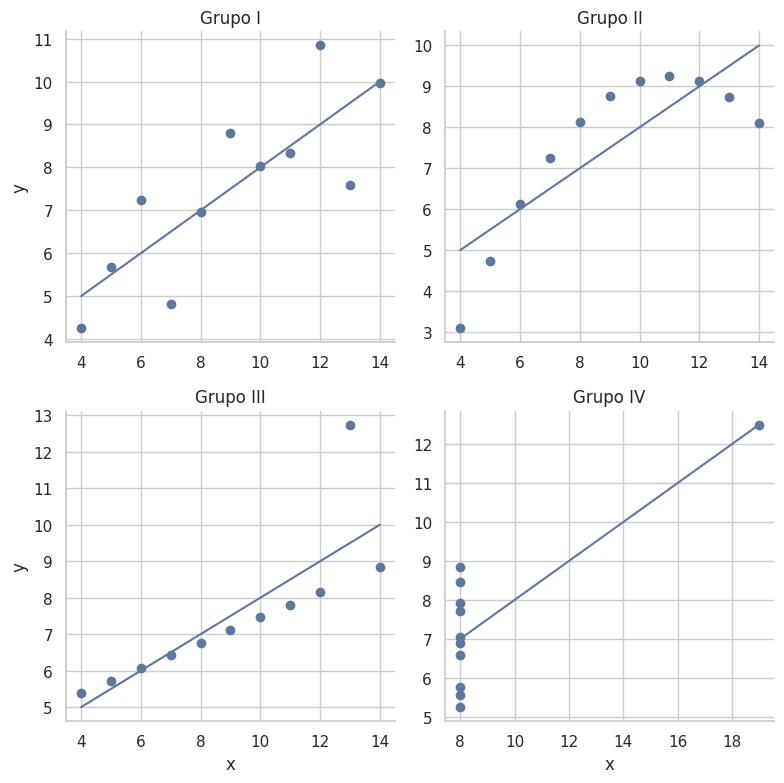

In [50]:

# Datos
datos = sns.load_dataset("anscombe").copy()

# --- Ajuste lineal por grupo con numpy.polyfit ---
def ajustar_lineal(df):
    # y = a*x + b  (a=pendiente, b=intercepto)
    a, b = np.polyfit(df["x"].values, df["y"].values, 1)
    y_pred = a*df["x"].values + b
    mse = np.mean((df["y"].values - y_pred)**2)
    ss_res = np.sum((df["y"].values - y_pred)**2)
    ss_tot = np.sum((df["y"].values - df["y"].mean())**2)
    r2 = 1 - ss_res/ss_tot
    return pd.Series({"pendiente": a, "intercepto": b, "MSE": mse, "R2": r2})

resumen = datos.groupby("dataset").apply(ajustar_lineal).reset_index()
print(resumen.to_string(index=False))

# --- Gráfico: puntos + recta ajustada por grupo ---
g = sns.FacetGrid(datos, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(plt.scatter, "x", "y")

# Trazo de la recta en cada eje usando los coeficientes calculados
for ax, (grupo, df) in zip(g.axes.flatten(), datos.groupby("dataset")):
    a = float(resumen.loc[resumen["dataset"] == grupo, "pendiente"])
    b = float(resumen.loc[resumen["dataset"] == grupo, "intercepto"])
    x_ord = np.linspace(df["x"].min(), df["x"].max(), 50)
    ax.plot(x_ord, a*x_ord + b)

g.set_axis_labels("x", "y")
g.set_titles("Grupo {col_name}")
plt.tight_layout()
plt.show()


Respuesta: Aunque las métricas del ajuste lineal son casi iguales en los cuatro grupos, la calidad real difiere: en el Grupo I el ajuste es válido, en el Grupo II la relación es curvilínea, en el Grupo III un outlier en y distorsiona la recta y en el Grupo IV un único punto extremo genera una correlación engañosa. Esto muestra que las métricas numéricas no bastan sin la visualización de los datos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

/tmp/ipython-input-1856045379.py:26: RankWarning: Polyfit may be poorly conditioned
  a2, b2 = np.polyfit(xs, ys, 1)


           grupo             modelo      MSE            R2
               I             Lineal 1.251154  6.665425e-01
              II      Polinomio g=2 0.000002  9.999995e-01
             III Lineal sin outlier 1.637640  5.630440e-01
              IV        Diagnóstico 1.249317  6.667073e-01
IV (sin outlier)        Diagnóstico 1.374249 -2.220446e-16


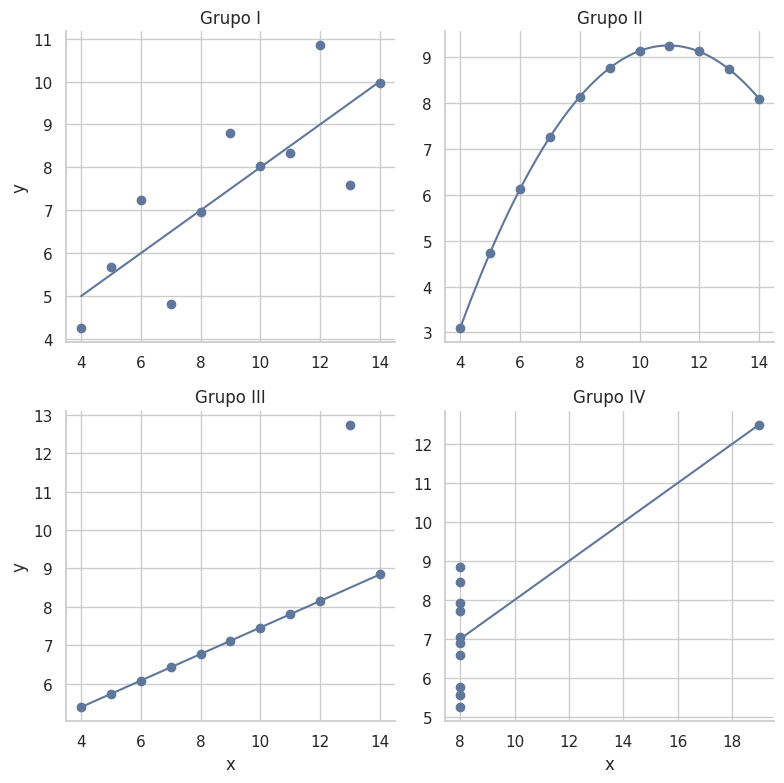

In [51]:
datos = sns.load_dataset("anscombe").copy()

resultados, lineas = [], []
linea_iv_sin = None   # guardaremos aquí la recta del Grupo IV sin el outlier

for grupo, df in datos.groupby("dataset"):
    x, y = df["x"].to_numpy(), df["y"].to_numpy()
    xg = np.linspace(x.min(), x.max(), 100)

    if grupo == "I":                   # lineal
        a, b = np.polyfit(x, y, 1); yhat = a*x + b; yg = a*xg + b; modelo = "Lineal"

    elif grupo == "II":                # polinomio grado 2
        c = np.polyfit(x, y, 2); yhat = np.polyval(c, x); yg = np.polyval(c, xg); modelo = "Polinomio g=2"

    elif grupo == "III":               # filtra outlier en y (IQR) y ajusta recta
        q1, q3 = np.percentile(y, [25, 75]); iqr = q3 - q1
        m = (y >= q1 - 1.5*iqr) & (y <= q3 + 1.5*iqr)
        a, b = np.polyfit(x[m], y[m], 1); yhat = a*x + b; yg = a*xg + b; modelo = "Lineal sin outlier"

    else:                              # IV: x casi constante; mostramos recta y también "sin outlier"
        a, b = np.polyfit(x, y, 1); yhat = a*x + b; yg = a*xg + b; modelo = "Diagnóstico"
        # ---- línea y métricas SIN el punto de mayor x (outlier) ----
        i_out = x.argmax()
        xs, ys = np.delete(x, i_out), np.delete(y, i_out)
        a2, b2 = np.polyfit(xs, ys, 1)
        xg2 = np.linspace(xs.min(), xs.max(), 2)               # solo extremos para una línea corta
        linea_iv_sin = (xg2, a2*xg2 + b2)                      # la dibujaremos luego con línea discontinua
        mse_sin = float(np.mean((ys - (a2*xs + b2))**2))
        r2_sin  = float(1 - ((ys - (a2*xs + b2))**2).sum() / ((ys - ys.mean())**2).sum())
        resultados.append({"grupo": "IV (sin outlier)", "modelo": "Diagnóstico", "MSE": mse_sin, "R2": r2_sin})

    mse = float(np.mean((y - yhat)**2))
    r2  = float(1 - ((y - yhat)**2).sum() / ((y - y.mean())**2).sum())
    resultados.append({"grupo": grupo, "modelo": modelo, "MSE": mse, "R2": r2})
    lineas.append(pd.DataFrame({"dataset": grupo, "x": xg, "y_linea": yg}))

# ---- tabla de resultados ----
print(pd.DataFrame(resultados).sort_values("grupo").to_string(index=False))

# ---- gráfico: puntos + línea/modelo por grupo (y línea discontinua “sin outlier” en IV) ----
pred = pd.concat(lineas, ignore_index=True)
g = sns.FacetGrid(datos, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(plt.scatter, "x", "y")
for ax, (grupo, dfp) in zip(g.axes.flatten(), pred.groupby("dataset")):
    ax.plot(dfp["x"], dfp["y_linea"])
# dibuja la línea “sin outlier” específicamente en el eje del Grupo IV
if linea_iv_sin is not None:
    ax_iv = g.axes_dict["IV"]
    ax_iv.plot(linea_iv_sin[0], linea_iv_sin[1], linestyle="--")  # recta sin el punto extremo
g.set_axis_labels("x","y"); g.set_titles("Grupo {col_name}")
plt.tight_layout(); plt.show()




En el Grupo IV la mayoría de los puntos se concentran en x=8, sin mostrar variación que permita estimar una recta confiable. El único punto con x=19 funciona como un valor extremo que determina por completo la pendiente y el R^2. Esto genera la ilusión de un buen ajuste lineal, pero en realidad los datos no presentan relación lineal: si se elimina ese punto, la pendiente desaparece y el modelo pierde sentido.